In [11]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scipy.integrate as integrate
import math 
from ipywidgets import interact, interactive, fixed, interact_manual
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.animation import FuncAnimation
from scipy.special import gamma


from matplotlib import animation, rc
from IPython.display import HTML

# 1.Neutrino Oscillation - Precession Equation
For a quantum state $\ket{\psi(t)}$, the density matrix is defined as

$$\rho(t) = \ket{\psi(t)}\bra{\psi(t)}$$

We can also define the density matrix for a statiscal ensamble of states (incoherent mixture),where each state $\ket{\psi_i(t)}$ have a statistical weight $p_i$. The last case represents what is caled a *mixed state* and the former one a *pure state*. 

The density matrix evolution is given by

$$i\frac{d\rho}{dt} = [H , \rho] \;\;\;\rightarrow  \;\;\; i\frac{d\rho_i}{dt}= \epsilon_{ijk} H_{j} \rho_{k}$$

Here we ignore the Hamiltoninan component proportiona to the identity, which is irrelevant for the evolution (just contibute with a global phase). In a scnario of **2 families of neutrinos**, we can decompose the matrices in **Pauli matrices** (in 3 families, we decompose the in Gell-Mann matrices)

$$ H = -\frac{1}{2}\vec{\sigma} \cdot \vec{B} \text{,} \;\;\;\;\; \rho= \frac{1}{2} \mathbf{1} + \frac{1}{2} \vec{\sigma} \cdot \vec{P}\text{,} \;\;\;\;\; \vec{\sigma}=(\sigma_1,\sigma_2,\sigma_3)$$

Therefore, the evoltuion becames a precession equation, where the coeficients of expansion in Pauli matrices work as components of a vector in this 3D space.

$$  i\frac{d}{dt} P_i(t) = \frac{i}{2} P_i(t) B_j [\sigma_i,\sigma_j] \;\;\;\;\rightarrow\;\;\;\;  \frac{d}{dt} \vec{P}(t)= \vec{P}(t)\times \vec{B}$$

Note that the coeficients of expansion in $\sigma_i$ depends on the baisis that we are work in, where always the 3rd component $P_3$ will give us the content of eigenstates of that basis in the state $\rho (t)$ ($\ket{\psi(t)}$)

* **Falvor Basis $\{\nu_e,\nu_x\}$**: 

$$\vec{P}_F(\nu_e)=(0,0,1) =+\hat{e}^F_3, \;\;\;\; \vec{P}_F(\nu_x)=(0,0,-1) =-\hat{e}^F_3$$


* **Mass Basis $\{\nu_1,\nu_2\}$**: The baisis where the Hamiltoninan is diagonal

$$\vec{P}_M(\nu_1)=(0,0,1) =+\hat{e}^M_3, \;\;\;\; \vec{P}_M(\nu_2)=(0,0,-1) =-\hat{e}^M_3$$

$$\vec{B}=(0,0,\Delta m^2/2E)=\Delta m^2/2E \hat{e}^M_3$$


The probability of detecting the neutrino in a eigenstate of each any basis is found by projecting in the 3rd component direction.


**References**

[1] Giunti Carlo, And Chung W. Kim. 2007. Fundamentals of Neutrino Physics and Astrophysics. Oxford university press. (**Section 9.6**)

$\newcommand{\ket}[1]{|#1\rangle} \newcommand{\bra}[1]{\langle#1|}$

## 1.1 - Test - Fixed Parameters

The correspondent set of equations, to be implemented in the ODE solver, is
 
$\frac{dS_1}{dt} = S_2 B_3 - S_3 B_2$

$\frac{dS_2}{dt} = S_3 B_1 - S_1 B_3$

$\frac{dS_3}{dt} = S_1 B_2 - S_2 B_1$

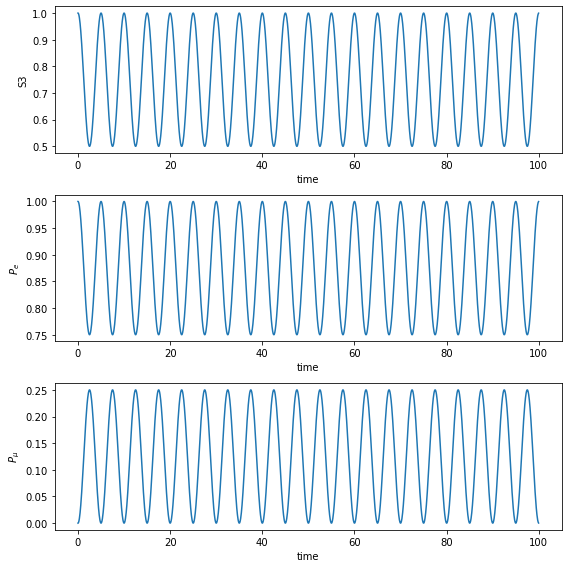

In [2]:
#Defining the set of funcitons that build up the ODE
def f(y, t, params):
    S1, S2, S3 = y      # unpack current values of y
    B1, B2, B3= params  # unpack parameters
    derivs = [S2*B3-S3*B2,      # list of dy/dt=f functions
              S3*B1-S1*B3,
              S1*B2-S2*B1]
    return derivs

# Parameters
B= 2*math.pi/5 # B Magnitude prop to (\Delta m^2)/2E
theta=math.pi/6 #B angle -> depend on vaccum angle, and potential Acc(E,Ne)

B1 = B*np.sin(theta)       
B2 = 0
B3 = B*np.cos(theta)      

# Initial values
S1_0 = 0   
S2_0 = 0     
S3_0 = 1.0      

# Parameters for ODE solver
params = [B1, B2, B3]

# Initial conditions for ODE solver
y0 = [S1_0, S2_0, S3_0]

# Make time array for solution
tStop = 100.
tInc = 0.05
t = np.arange(0., tStop, tInc)

# Call the ODE solver
psoln = odeint(f, y0, t, args=(params,))

# Plot results
fig = plt.figure(1, figsize=(8,8))

# Plot theta as a function of time
ax1 = fig.add_subplot(311)
ax1.plot(t, psoln[:,2])
ax1.set_xlabel('time')
ax1.set_ylabel('S3')

ax2 = fig.add_subplot(312)
ax2.plot(t, 1/2*(1+psoln[:,2]))
ax2.set_xlabel('time')
ax2.set_ylabel('$P_{e}$')

ax3 = fig.add_subplot(313)
ax3.plot(t, 1/2*(1-psoln[:,2]))
ax3.set_xlabel('time')
ax3.set_ylabel('$P_{\mu}$')


plt.tight_layout()
plt.show()

In [3]:
#Interactive Plot -> Polarization vector precession as function of time
def plotting(i):
  fig = plt.figure()
  sub = fig.add_subplot(1,1,1,projection='3d')
  #Setting axes limits
  sub.set_zlim3d(0,1)
  sub.set_xlim3d(-1,1)
  sub.set_ylim3d(-1,1)
  #Neutrino polarization vector S(t)
  sub.quiver(0, 0, 0, psoln[i,0], psoln[i,1], psoln[i,2], arrow_length_ratio=0.05,color='b') 
  #Parametric curve of S(t)
  sub.plot(psoln[:,0], psoln[:,1], psoln[:,2],c='b')
  #Hamiltonian polarization vector B=cte
  sub.quiver(0, 0, 0, B1, B2, B3, arrow_length_ratio=0.05,color='r')
  #Flavo base vectors
  sub.quiver(0, 0, 0, 1, 0, 0, arrow_length_ratio=0.05,color='k')
  sub.quiver(0, 0, 0, 0, 1, 0, arrow_length_ratio=0.05,color='k')
  sub.quiver(0, 0, 0, 0, 0, 1, arrow_length_ratio=0.05,color='k')
  plt.show()
  print(psoln[i,0],psoln[i,1],psoln[i,2])

#Make it interactive
interactive_plot=interactive(plotting,i=(0,2000,1)) 
interactive_plot


interactive(children=(IntSlider(value=1000, description='i', max=2000), Output()), _dom_classes=('widget-inter…

## 1.2 - Real Mixing Parameters and Matter Effect

Here we introduce the dependence on neutrino energy E and on the electron density $N_e$, using realistc values (such as mixture angle $\theta$ and mass difference $\Delta m^2$)

http://pdg.lbl.gov/2020/tables/rpp2020-sum-leptons.pdf

In [4]:
G_F=1.1663787*10**(-23); #eV⁻² - Fermi Constant
delta_m2=7.53*10**(-5); #eV² - Neutrino solar mass squared difference
theta=np.arcsin(math.sqrt(0.307)); #Neutrino solar mixing angle
N_A=6.02*10**(23) #Avogadro constant

#Idea(To-Do): Define the neutrino mixing parameters as global variables
#and pass just N_e and E to the functions

#Calculate the effective mass squared difference in matter
def delta_m2_eff(delta_m2,theta,Acc):
  delta = math.sqrt((delta_m2*np.cos(2*theta)-Acc)**2+(delta_m2*np.sin(2*theta))**2)
  return delta

#Calculate the effective mixing angle in matter
def theta_eff(delta_m2,theta,Acc):
  theta_eff=(1/2)*math.atan2(1,1/((math.tan(2*theta))/(1-(Acc/(delta_m2*np.cos(2*theta))))))
  return theta_eff

#Calculate the matter "Potential" - Acc=2EV_cc
def Acc(N_e,E):
  A = 2*math.sqrt(2)*E*G_F*N_e
  return A

#Set of equations - Precession
def f(y, t, params):
    S1, S2, S3 = y      # unpack current values of y
    B1, B2, B3= params  # unpack parameters
    derivs = [S2*B3-S3*B2,      # list of dy/dt=f functions
              S3*B1-S1*B3,
              S1*B2-S2*B1]
    return derivs

In [5]:
#Electron density N_e and enerfy E arrays

N_e=np.logspace(0, 4, 1000, endpoint=True)  #cm⁻³/N_A
N_e_energy=N_A*N_e*(1.973*10**(-5))**3  #eV³ 

#E=1*10**(6) #eV
E=np.arange(1, 100, 1)*10**(6) #eV

### Ressonance Values

In [6]:
A_R=delta_m2*np.cos(2*theta)
N_e_R=A_R/(2*math.sqrt(2)*E*G_F)
print("%e eV³"%(N_e_R[0]))
#print("%e cm⁻³/N_A"%(N_e_R[98]*(8065.6**3)/N_A))
print("%e cm⁻³/N_A"%(N_e_R[0]/(N_A*(1.973*10**(-5))**3)))

8.810442e+11 eV³
1.905548e+02 cm⁻³/N_A


### $\Delta m_{M}^2$ and $\theta_{M}$ behaivour with density and energy

In [7]:
#Mixing angle arrays
theta_eff_vec= np.vectorize(theta_eff)
theta_M=[]
#Mass squared and their difference arrays
m1_2_M=[]
m2_2_M=[]
delta_m2_eff_vec=[]

for E_i in range(len(E)):
  m1_2_M.append([])
  m2_2_M.append([])
  theta_M.append([])
  delta_m2_eff_vec.append([])
  for N_i in range(len(N_e_energy)):
    #Mass squared
    delta_m2_eff_vec[E_i].append(delta_m2_eff(delta_m2,theta,Acc(N_e_energy[N_i],E[E_i])))
    m1_2_M[E_i].append((delta_m2+Acc(N_e_energy[N_i],E[E_i])-delta_m2_eff_vec[E_i][N_i])/2)
    m2_2_M[E_i].append((delta_m2+Acc(N_e_energy[N_i],E[E_i])+delta_m2_eff_vec[E_i][N_i])/2)
    #Mixing angle
    theta_M[E_i].append(theta_eff_vec(delta_m2,theta,Acc(N_e_energy[N_i],E[E_i])))


In [8]:
def plotting_1(E_i):
  plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
  plt.subplot(121)
  plt.plot(N_e,m1_2_M[E_i],label=r'$m²_{M1}$')
  plt.plot(N_e,m2_2_M[E_i],label=r'$m²_{M2}$')
  N_R=N_e_R[E_i]/(N_A*(1.973*10**(-5))**3)
  #plt.xlim(0, 2*N_R)
  plt.title(r'$N_{e,R} = $ %f [cm^{-3}/N_A], Energy %.1e [eV]'%(N_R,E[E_i]))
  plt.legend(loc='upper left')
  plt.xlabel('N_e[cm⁻³/N_A]')
  plt.xscale('log')
  plt.ylabel(r'$m²_{M1}$,$m²_{M2}$ [eV²]')
  plt.yscale('log')

  plt.subplot(122)
  theta_M_deg=[i * 180/np.pi for i in theta_M[E_i]]
  plt.plot(N_e,theta_M_deg)
  plt.xscale('log')
  plt.xlabel('N_e[cm⁻³]')
  plt.ylabel(r'$\theta$ [deg]')
  plt.show()
  print('Energy %e eV'%(E[E_i]))

interactive_plot=interactive(plotting_1,E_i=(0,98,1))
interactive_plot

interactive(children=(IntSlider(value=49, description='E_i', max=98), Output()), _dom_classes=('widget-interac…

### Soultions - Energy Dependence

In [9]:
#N_e=np.arange(0, 100, 1) #cm⁻³/N_A
N_e=np.logspace(-1, 2, 100, endpoint=True)  #cm⁻³/N_A
N_e_energy=N_A*N_e*(1.973*10**(-5))**3  #eV³ 
#E=1*10**(6) #eV
E=np.arange(1, 100, 1)*10**(6) #eV

In [10]:
# Parameters
#A=Acc(N_e,E[:])

#delta_m2_eff_vec=np.vectorize(delta_m2_eff)
#B= delta_m2_eff_vec(delta_m2,theta,Acc(N_e,E[:]))/(2*E[:])

#theta_eff_vec= np.vectorize(theta_eff) 
#theta_M=theta_eff_vec(delta_m2,theta,Acc(N_e,E[:])) #B angle -> depend on vaccum angle, and potential Acc(E,Ne)

#B1 = -B*np.sin(2*theta_M)       
#B2 = 0*B
#B3 = B*np.cos(2*theta_M)

#Using for
B=[]
B1=[]
B2=[]
B3=[]
theta_M=[]
for E_i in range(len(E)):
  B.append(delta_m2_eff(delta_m2,theta,Acc(N_e_energy[30],E[E_i]))/(2*E[E_i]))
  theta_M.append(theta_eff(delta_m2,theta,Acc(N_e_energy[30],E[E_i]))) #B angle -> depend on vaccum angle, and potential Acc(E,Ne)

  B1.append(-B[E_i]*np.sin(2*theta_M[E_i]))   
  B2.append(0)
  B3.append(B[E_i]*np.cos(2*theta_M[E_i]))


# Initial values
S1_0 = 0   
S2_0 = 0     
S3_0 = 1.0      

# Bundle parameters for ODE solver
params = [B1, B2, B3]

# Bundle initial conditions for ODE solver
y0 = [S1_0, S2_0, S3_0]

# Make time array for solution
tStop = 10**15
tInc = 10**12
t = np.arange(0., tStop, tInc)

# Call the ODE solver
psoln=[]
for E_i in range(len(E)):
  params = [B1[E_i], B2[E_i], B3[E_i]]
  psoln.append(odeint(f, y0, t, args=(params,)))


In [11]:
print('B_max:',np.amax(B))
print('B_min:',np.amin(B))

B[47]
len(t)
psoln[E_i][:][0]

B_max: 3.762616458485243e-11
B_min: 3.6096400250899505e-13


array([0., 0., 1.])

In [12]:
psoln_curve=np.transpose(psoln,(0,2,1))

def plotting(i,E_i):
  fig = plt.figure()
  sub = fig.add_subplot(1,1,1,projection='3d')
  sub.set_zlim3d(-1,1)
  sub.set_xlim3d(-1,1)
  sub.set_ylim3d(-1,1)
  sub.quiver(0, 0, 0, psoln[E_i][i][0], psoln[E_i][i][1], psoln[E_i][i][2], arrow_length_ratio=0.05,color='b')
  sub.plot(psoln_curve[E_i][0][:], psoln_curve[E_i][1][:], psoln_curve[E_i][2][:],c='b')
  #sub.quiver(0, 0, 0, B1[E_i], B2[E_i], B3[E_i],color='r',normalize=True)
  sub.quiver(0, 0, 0, B1[E_i], B2[E_i], B3[E_i],arrow_length_ratio=0.05,color='r',normalize=True)
  sub.quiver(-0.5, 0, 0, 1, 0, 0, arrow_length_ratio=0.05,color='k')
  sub.quiver(0, -0.5, 0, 0, 1, 0, arrow_length_ratio=0.05,color='k')
  sub.quiver(0, 0, -0.5, 0, 0, 1, arrow_length_ratio=0.05,color='k')
  plt.show()
  #print(psoln[i,0],psoln[i,1],psoln[i,2])

interactive_plot=interactive(plotting,i=(0,999,1),E_i=(0,98,1))
interactive_plot

interactive(children=(IntSlider(value=499, description='i', max=999), IntSlider(value=49, description='E_i', m…

### Soultions - Energy and Density Dependence

In [13]:
# Parameters
#A=Acc(N_e,E[:])

#delta_m2_eff_vec=np.vectorize(delta_m2_eff)
#B= delta_m2_eff_vec(delta_m2,theta,Acc(N_e,E[:]))/(2*E[:])

#theta_eff_vec= np.vectorize(theta_eff) 
#theta_M=theta_eff_vec(delta_m2,theta,Acc(N_e,E[:])) #B angle -> depend on vaccum angle, and potential Acc(E,Ne)

#B1 = -B*np.sin(2*theta_M)       
#B2 = 0*B
#B3 = B*np.cos(2*theta_M)

#Using for
# Initial values
S1_0 = 0   
S2_0 = 0     
S3_0 = 1.0  #Electronic Neutrino

# Initial conditions for ODE solver
y0 = [S1_0, S2_0, S3_0]

# Make time array for solution
tStop = 10**15
tInc = 10**12
t = np.arange(0., tStop, tInc)

B=[]
B1=[]
B2=[]
B3=[]
theta_M=[]
psoln=[]

for E_i in range(len(E)):
  B.append([])
  B1.append([])
  B2.append([])
  B3.append([])
  psoln.append([])
  theta_M.append([])

  for N_i in range(len(N_e_energy)):
    B[E_i].append(delta_m2_eff(delta_m2,theta,Acc(N_e_energy[N_i],E[E_i]))/(2*E[E_i]))
    theta_M[E_i].append(theta_eff(delta_m2,theta,Acc(N_e_energy[N_i],E[E_i]))) #B angle -> depend on vaccum angle, and potential Acc(E,Ne)

    B1[E_i].append(-B[E_i][N_i]*np.sin(2*theta_M[E_i][N_i]))   
    B2[E_i].append(0)
    B3[E_i].append(B[E_i][N_i]*np.cos(2*theta_M[E_i][N_i]))

    # Call the ODE solver
    params = [B1[E_i][N_i], B2[E_i][N_i], B3[E_i][N_i]]
    psoln[E_i].append(odeint(f, y0, t, args=(params,)))

In [14]:
psoln_curve=np.transpose(psoln,(0,1,3,2))

def plotting(i,E_i,N_i):
  fig = plt.figure()
  sub = fig.add_subplot(1,1,1,projection='3d')
  sub.set_zlim3d(-1,1)
  sub.set_xlim3d(-1,1)
  sub.set_ylim3d(-1,1)
  sub.quiver(0, 0, 0, psoln[E_i][N_i][i][0], psoln[E_i][N_i][i][1], psoln[E_i][N_i][i][2], arrow_length_ratio=0.05,color='b')
  sub.plot(psoln_curve[E_i][N_i][0][:], psoln_curve[E_i][N_i][1][:], psoln_curve[E_i][N_i][2][:],c='b')
  #sub.quiver(0, 0, 0, B1[E_i], B2[E_i], B3[E_i],color='r',normalize=True)
  sub.quiver(0, 0, 0, B1[E_i][N_i], B2[E_i][N_i], B3[E_i][N_i],arrow_length_ratio=0.05,color='r',normalize=True)
  sub.quiver(-0.5, 0, 0, 1, 0, 0, arrow_length_ratio=0.05,color='k')
  sub.quiver(0, -0.5, 0, 0, 1, 0, arrow_length_ratio=0.05,color='k')
  sub.quiver(0, 0, -0.5, 0, 0, 1, arrow_length_ratio=0.05,color='k')
  plt.show()
  #print(psoln[i,0],psoln[i,1],psoln[i,2])
  print('E[MeV]:',E[E_i]/(10**6))
  print('N_e[cm⁻³/N_A]:',N_e[N_i])

interactive_plot=interactive(plotting,i=(0,999,1),E_i=(0,98,1),N_i=(0,98,1))
interactive_plot

interactive(children=(IntSlider(value=499, description='i', max=999), IntSlider(value=49, description='E_i', m…

In [15]:
psoln_curve=np.transpose(psoln,(0,1,3,2))

def plotting(i,E_i,N_i):
  
  #plt.subplot(121)
  fig = plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
  sub = fig.add_subplot(1,2,1,projection='3d')
  sub.set_zlim3d(-1,1)
  sub.set_xlim3d(-1,1)
  sub.set_ylim3d(-1,1)
  sub.quiver(0, 0, 0, psoln[E_i][N_i][i][0], psoln[E_i][N_i][i][1], psoln[E_i][N_i][i][2], arrow_length_ratio=0.05,color='b')
  sub.plot(psoln_curve[E_i][N_i][0][:], psoln_curve[E_i][N_i][1][:], psoln_curve[E_i][N_i][2][:],c='b')
  #sub.quiver(0, 0, 0, B1[E_i], B2[E_i], B3[E_i],color='r',normalize=True)
  sub.quiver(0, 0, 0, B1[E_i][N_i], B2[E_i][N_i], B3[E_i][N_i],arrow_length_ratio=0.05,color='r',normalize=True)
  sub.quiver(-0.5, 0, 0, 1, 0, 0, arrow_length_ratio=0.05,color='k')
  sub.quiver(0, -0.5, 0, 0, 1, 0, arrow_length_ratio=0.05,color='k')
  sub.quiver(0, 0, -0.5, 0, 0, 1, arrow_length_ratio=0.05,color='k')
  #print(psoln[i,0],psoln[i,1],psoln[i,2])

  ax2 = fig.add_subplot(1,2,2)
  ax2.plot(t, 1/2*(1+psoln_curve[E_i][N_i][2]))
  ax2.set_xlabel('time')
  ax2.set_ylabel('$P_{e}$')
  fig.show()

  print('E[MeV]:',E[E_i]/(10**6))
  print('N_e[cm⁻³/N_A]:',N_e[N_i])


interactive_plot=interactive(plotting,i=(0,999,1),E_i=(0,98,1),N_i=(0,98,1))
interactive_plot

interactive(children=(IntSlider(value=499, description='i', max=999), IntSlider(value=49, description='E_i', m…

In [17]:
#Saving Python Arrays
np.save('Output/Sol_2Nu_f(E,N_e)_t.npy', psoln) 
np.save('Output/B_2Nu_f(E,N_e)_t.npy', B) 
np.save('Output/B1_2Nu_f(E,N_e)_t.npy', B1) 
np.save('Output/B2_2Nu_f(E,N_e)_t.npy', B2) 
np.save('Output/B3_2Nu_f(E,N_e)_t.npy', B3) 
np.save('Output/theta_M_2Nu_f(E,N_e)_t.npy', theta_M) 


# 2.Sun

Here we look for the neutrino evoltuion considering the sun matter profile: $N_e(r) = 245 N_A exp(-10.45 r/R_\odot)$

**References:**

[1] Giunti Carlo, And Chung W. Kim. 2007. Fundamentals of Neutrino Physics and Astrophysics. Oxford university press. (**Chapter 10**)

[2] Bahcall, John N., M. H. Pinsonneault, and Sarbani Basu. 2001. “Solar Models: Current Epoch and Time Dependences, Neutrinos, and Helioseismological Properties.” The Astrophysical Journal 555 (2): 990.

In [2]:
G_F=1.1663787*10**(-23); #eV⁻² - Fermi Constant
delta_m2=7.53*10**(-5); #eV² - Neutrino solar mass squared difference
theta=np.arcsin(math.sqrt(0.307)); #Neutrino solar mixing angle
N_A=6.02*10**(23) #Avogadro constant

#Idea(To-Do): Define the neutrino mixing parameters as global variables
#and pass just N_e and E to the functions

#Calculate the effective mass squared difference in matter
def delta_m2_eff(delta_m2,theta,Acc):
  delta = math.sqrt((delta_m2*np.cos(2*theta)-Acc)**2+(delta_m2*np.sin(2*theta))**2)
  return delta

#Calculate the effective mixing angle in matter
def theta_eff(delta_m2,theta,Acc):
  theta_eff=(1/2)*math.atan2(1,1/((math.tan(2*theta))/(1-(Acc/(delta_m2*np.cos(2*theta))))))
  return theta_eff

#Calculate the matter "Potential" - Acc=2EV_cc
def Acc(N_e,E):
  A = 2*math.sqrt(2)*E*G_F*N_e
  return A

### Solar Density Profile

Here we implement the evolution for the solar neutrino case, produced as electrons. First we look at the electron density profile as funtion of the trajectory position N_e(r) insed the Sun.

In [3]:
#Giunti Chap.10 and https://arxiv.org/pdf/astro-ph/0010346.pdf
R_sol_m = 6.96340*10**8 #m - Solar radius
R_sol= R_sol_m*(8*10**5) #eV⁻¹
r_0=R_sol/10.54
N_0=245 #N_A cm⁻³
N_0=N_A*N_0*(1.973*10**(-5))**3#eV³ 

#Solar Density Profile
def N_e_sol(r):
  N = N_0*math.exp(-r/r_0)
  return N

Text(0.5, 1.0, 'Sun Electron Density Profile')

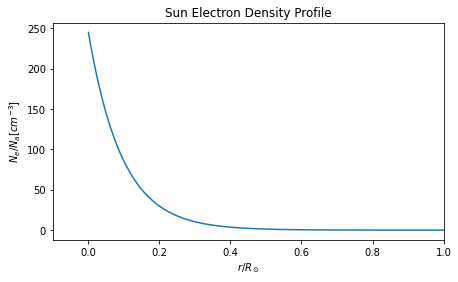

In [4]:
#Density profile plot
r_per_R_sol=np.arange(0, 2, 0.001)
r=R_sol*r_per_R_sol

N_e_sol_vec= np.vectorize(N_e_sol)

fig = plt.figure(1, figsize=(7,4))
plt.plot(r_per_R_sol,N_e_sol_vec(r)/(N_A*(1.973*10**(-5))**3))
plt.xlabel(r'$r/R_\odot$')
plt.ylabel(r'$N_e/N_a[cm^{-3}]$')
plt.xlim(right=1)
plt.title("Sun Electron Density Profile")
#plt.savefig(root_folder+"Figures/sun_profile.png")

### Solar Matter Evolution - 1st Approach

He we try to pass the Hamiltonian polariztion vectors components (B1,B2,B3) as parameters for the ODE solver.

In [22]:
#Electron density N_e and enerfy E arrays
N_e=np.logspace(0, 4, 1000, endpoint=True)  #cm⁻³/N_A
N_e_energy=N_A*N_e*(1.973*10**(-5))**3  #eV³ 

#E=1*10**(6) #eV
E=np.arange(1, 100, 1)*10**(6) #eV

In [23]:
# Initial values
S1_0 = 0   
S2_0 = 0     
S3_0 = 1.0  #Electronic Neutrino

# Initial conditions for ODE solver
y0 = [S1_0, S2_0, S3_0]

# Make time array for solution
#tStop = 10**15
#tInc = 10**12
#t = np.arange(0., tStop, tInc)
t=r #relativistic neutrino

B=[]
B1=[]
B2=[]
B3=[]
theta_M=[]
psoln=[]


for E_i in range(len(E)):
  B.append([])
  B1.append([])
  B2.append([])
  B3.append([])
  psoln.append([])
  theta_M.append([])

  for t_i in range(len(t)):
    N=N_e_sol(t[t_i])

    B[E_i].append(delta_m2_eff(delta_m2,theta,Acc(N,E[E_i]))/(2*E[E_i]))
    theta_M[E_i].append(theta_eff(delta_m2,theta,Acc(N,E[E_i]))) #B angle -> depend on vaccum angle, and potential Acc(E,Ne)

    B1[E_i].append(-B[E_i][t_i]*np.sin(2*theta_M[E_i][t_i]))   
    B2[E_i].append(0)
    B3[E_i].append(B[E_i][t_i]*np.cos(2*theta_M[E_i][t_i]))

In [24]:
def plotting(t_i,E_i):
  fig = plt.figure()
  sub = fig.add_subplot(1,1,1,projection='3d')
  sub.set_zlim3d(-1,1)
  sub.set_xlim3d(-1,1)
  sub.set_ylim3d(-1,1)
  sub.quiver(0, 0, 0, B1[E_i][t_i], B2[E_i][t_i], B3[E_i][t_i],arrow_length_ratio=0.05,color='r',normalize=True)
  sub.quiver(-0.5, 0, 0, 1, 0, 0, arrow_length_ratio=0.05,color='k')
  sub.quiver(0, -0.5, 0, 0, 1, 0, arrow_length_ratio=0.05,color='k')
  sub.quiver(0, 0, -0.5, 0, 0, 1, arrow_length_ratio=0.05,color='k')
  plt.show()

interactive_plot=interactive(plotting,t_i=(0,len(t)-1,1),E_i=(0,98,1))
interactive_plot

interactive(children=(IntSlider(value=999, description='t_i', max=1999), IntSlider(value=49, description='E_i'…

### Solar Evolution - 2nd Approach

Here we try to use defined functions for de B matter polarization vector components (B1,B2,B3) as function of (N_e,E), instead of arrays as before. This helps us to pass time dependent functions to de ODE solver.

 Ex: B_matter=f(N_e(t),E)



In [6]:
G_F=1.1663787*10**(-23); #eV⁻²
delta_m2=7.53*10**(-5); #eV²
theta=np.arcsin(math.sqrt(0.307));
N_A=6.02*10**(23)


def delta_m2_eff(delta_m2,theta,Acc):
  delta = math.sqrt((delta_m2*np.cos(2*theta)-Acc)**2+(delta_m2*np.sin(2*theta))**2)
  return delta

def theta_eff(delta_m2,theta,Acc):
  theta_eff=(1/2)*math.atan2(1,1/((math.tan(2*theta))/(1-(Acc/(delta_m2*np.cos(2*theta))))))
  return theta_eff


def Acc(N_e,E):
  A = 2*math.sqrt(2)*E*G_F*N_e
  return A

def B_matter(N_e,E):
  B=delta_m2_eff(delta_m2,theta,Acc(N_e,E))/(2*E)
  theta_M=theta_eff(delta_m2,theta,Acc(N_e,E)) #B angle -> depend on vaccum angle, and potential Acc(E,Ne)

  B1=-B*np.sin(2*theta_M) 
  B2=0
  B3=B*np.cos(2*theta_M)
  return B,B1,B2,B3

#Solar Profile
R_sol = 6.96340*10**8 #m
R_sol= R_sol*(8*10**5) #eV⁻¹
r_0=R_sol/10.54
N_0=245 #N_A cm⁻³
N_0=N_A*N_0*(1.973*10**(-5))**3#eV³ 

def N_e_sol(r):
  N = N_0*math.exp(-r/r_0)
  return N

#EDO
def f(y, t, params):
    S1, S2, S3 = y      # unpack current values of y
    E= params  # unpack parameters
    B,B1,B2,B3 = B_matter(N_e_sol(t),E)
    derivs = [S2*B3-S3*B2,      # list of dy/dt=f functions
              S3*B1-S1*B3,
              S1*B2-S2*B1]
    return derivs

In [8]:
#Position r array 
#Note taht the step must be less than the shorther oscilation lenght 
#(lowest Energy)
r_per_R_sol=np.arange(0, 1, 0.000001) # units of R_solar
r=R_sol*r_per_R_sol #eV⁻¹
t=r #relativistic neutrino
#Energy array (100 KeV - 50 MeV, step=1 MeV)
#E=np.arange(0.1, 50, 1)*10**(6) #eV
E=[10**(5), 10**(6),2*10**(6),10**(7),3*10**(7)] #eV

# Initial values
S1_0 = 0   
S2_0 = 0     
S3_0 = 1.0  #Electronic Neutrino

# Initial conditions for ODE solver
y0 = [S1_0, S2_0, S3_0]


# Call the ODE solver
psoln=[]
for E_i in range(len(E)):
  psoln.append(odeint(f, y0, t, args=(E[E_i],)))

**Interactive Polarization Vector Evolution**

In [ ]:
psoln_curve=np.transpose(psoln,(0,2,1))

def plotting(t_i=0,E_i=0):
  print("Enegy: %.1e [eV]"%(E[E_i]))
  B,B1,B2,B3 = B_matter(N_e_sol(t[t_i]),E[E_i])
  fig = plt.figure()
  sub = fig.add_subplot(1,1,1,projection='3d')
  sub.set_zlim3d(-1,1)
  sub.set_xlim3d(-1,1)
  sub.set_ylim3d(-1,1)
  #sub.plot(psoln_curve[E_i][0][19000:19999], psoln_curve[E_i][1][19000:19999], psoln_curve[E_i][2][19000:19999],c='y')
  sub.plot(psoln_curve[E_i][0][::], psoln_curve[E_i][1][::], psoln_curve[E_i][2][::],c='y')
  sub.quiver(0, 0, 0, psoln[E_i][t_i][0], psoln[E_i][t_i][1], psoln[E_i][t_i][2], arrow_length_ratio=0.05,color='b')
  sub.quiver(0, 0, 0, B1, B2, B3,arrow_length_ratio=0.05,color='r',normalize=True)
  sub.quiver(-0.5, 0, 0, 1, 0, 0, arrow_length_ratio=0.05,color='k')
  sub.quiver(0, -0.5, 0, 0, 1, 0, arrow_length_ratio=0.05,color='k')
  sub.quiver(0, 0, -0.5, 0, 0, 1, arrow_length_ratio=0.05,color='k')
  plt.show()


interactive_plot=interactive(plotting,t_i=(0,len(t)-1,1),E_i=(0,len(E)-1,1))
interactive_plot

In [ ]:
# Plot 
Pe_high_E = [np.sin(theta)**2]*len(t)
Pe_low_E = [1-(1/2)*np.sin(2*theta)**2]*len(t)
Pmu_high_E = [1-np.sin(theta)**2]*len(t)
Pmu_low_E = [(1/2)*np.sin(2*theta)**2]*len(t)

In [ ]:
# Plot results
fig = plt.figure(1, figsize=(8,16))
for E_i in E:
    # Plot theta as a function of time
    ax1 = fig.add_subplot(311)
    ax1.plot(t, psoln_curve[E_i][2],label=r'E=%e eV'%(E[E_i]))
   

    ax2 = fig.add_subplot(312)
    ax2.plot(t, 1/2*(1+psoln_curve[E_i][2]),label=r'E=%e eV'%(E[E_i]))

    ax3 = fig.add_subplot(313)
    ax3.plot(t, 1/2*(1-psoln_curve[E_i][2]),label=r'E=%e eV'%(E[E_i]))

ax1 = fig.add_subplot(311)
ax1.set_xlabel('time')
ax1.set_ylabel('S3')
plt.legend(loc='upper right') 

# Plot 
Pe_high_E = [np.sin(theta)**2]*len(t)
Pe_low_E = [1-(1/2)*np.sin(2*theta)**2]*len(t)
Pmu_high_E = [1-np.sin(theta)**2]*len(t)
Pmu_low_E = [(1/2)*np.sin(2*theta)**2]*len(t)

ax2 = fig.add_subplot(312)
ax2.plot(t, Pe_high_E,label=r'$\overline{P}_{\nu_e \rightarrow \nu_e} = sin^2\theta$')
ax2.plot(t, Pe_low_E,label=r'$\overline{P}_{\nu_e \rightarrow \nu_e} = 1-\frac{1}{2}sin^22\theta$')
ax2.set_xlabel('time')
ax2.set_ylabel('$P_{e}$')
plt.legend(loc='upper right')

ax3 = fig.add_subplot(313)
ax3.plot(t, Pmu_high_E,label=r'$\overline{P}_{\nu_e \rightarrow \nu_\mu} = 1-sin^2\theta$')
ax3.plot(t, Pmu_low_E,label=r'$\overline{P}_{\nu_e \rightarrow \nu_\mu} = \frac{1}{2}sin^22\theta$')
ax3.set_xlabel('Time[eV⁻¹]')
ax3.set_ylabel('$P_{\mu}$')
plt.legend(loc='lower right')
plt.xlim(t[499500], t[500000])

ax4 = ax3.twiny()
ax4.set_xlim(ax3.get_xlim()[0]/(8*10**5),ax3.get_xlim()[1]/(8*10**5))
ax4.xaxis.set_ticks_position('bottom') 
ax4.xaxis.set_label_position('bottom')
ax4.spines['bottom'].set_position(('outward', 38))
ax4.set_xlabel('Distance [m]')
ax4 = ax3.twiny()

ax5 = ax3.twiny()
ax5.set_xlim(ax4.get_xlim()[0]/(3*10**8),ax4.get_xlim()[1]/(3*10**8))
ax5.xaxis.set_ticks_position('bottom') 
ax5.xaxis.set_label_position('bottom')
ax5.spines['bottom'].set_position(('outward', 76))
ax5.set_xlabel('Time [s]')

plt.tight_layout()
plt.show()

#### Survival and Transition Probabilities

Due to the huge distances and its relative uncertanties in Solar neutrinos, the oscillation phase variation is large than $2\pi$ in the detector energy resolution ($\Delta m^2_M L/2E$). Therefore, what is measured are the averaged probabilities $\overline{P}_{\nu \rightarrow \nu}$.
The averaged survival probability for a electron neutrino with initial effective mix angle $\theta_{M}^{(i)}$ is

$$\overline{P}^{adiabatic}_{\nu_e \rightarrow \nu_e}= \frac{1}{2} + \frac{1}{2} \cos{2\theta_{M}^{(i)}}\cos{2\theta}$$

For low energy where $\theta_{M}^{(i)} \approx \theta$ 

$$\overline{P}^{Low}_{\nu_e \rightarrow \nu_e} \approx 1 - \frac{1}{2} \sin^2{2\theta}$$

For high energy neutrinos where $\theta_{M}^{(i)} \approx \pi/2$

$$\overline{P}^{High}_{\nu_e \rightarrow \nu_e} \approx \frac{1}{2} - \frac{1}{2} \cos{2\theta}= \sin^2{\theta}$$


In [28]:
psoln_curve=np.transpose(psoln,(0,2,1))

Pe_high_E = [np.sin(theta)**2]*len(t)
Pe_low_E = [1-(1/2)*np.sin(2*theta)**2]*len(t)
Pmu_high_E = [1-np.sin(theta)**2]*len(t)
Pmu_low_E = [(1/2)*np.sin(2*theta)**2]*len(t)
Pe_E=[]

for E_i in range(len(E)):
  theta_M=theta_eff(delta_m2,theta,Acc(N_e_sol(0),E[E_i]))
  Pe_E.append([1/2+(1/2)*np.cos(2*theta_M)*np.cos(2*theta)]*len(t))

def plotting(E_i=0):
  print("Enegy: %.1e [eV]"%(E[E_i]))

  fig = plt.figure(1, figsize=(8,8)) 

  plt.subplot(211)
  plt.plot(t, 1/2*(1+psoln_curve[E_i][2]),label=r'E=%e eV'%(E[E_i]))
  plt.plot(t, Pe_high_E,label=r'$\overline{P}_{\nu_e \rightarrow \nu_e}^{High} = sin^2\theta$')
  plt.plot(t, Pe_low_E,label=r'$\overline{P}_{\nu_e \rightarrow \nu_e}^{Low} = 1-\frac{1}{2}sin^22\theta$')
  plt.plot(t, Pe_E[E_i],label=r'$\overline{P}_{\nu_e \rightarrow \nu_e}$')
  plt.xlabel('time')
  plt.ylabel('$P_{e}$')
  plt.legend(loc='upper right')

  plt.subplot(212)
  plt.plot(t, 1/2*(1-psoln_curve[E_i][2]),label=r'E=%e eV'%(E[E_i]))
  plt.plot(t, Pmu_high_E,label=r'$\overline{P}_{\nu_e \rightarrow \nu_\mu}^{High} = 1-sin^2\theta$')
  plt.plot(t, Pmu_low_E,label=r'$\overline{P}_{\nu_e \rightarrow \nu_\mu}^{Low} = \frac{1}{2}sin^22\theta$')
  plt.xlabel('time')
  plt.ylabel('$P_{\mu}$')
  plt.legend(loc='lower right')

  plt.show()

interactive_plot=interactive(plotting,E_i=(0,len(E)-1,1))
interactive_plot

interactive(children=(IntSlider(value=0, description='E_i', max=4), Output()), _dom_classes=('widget-interact'…

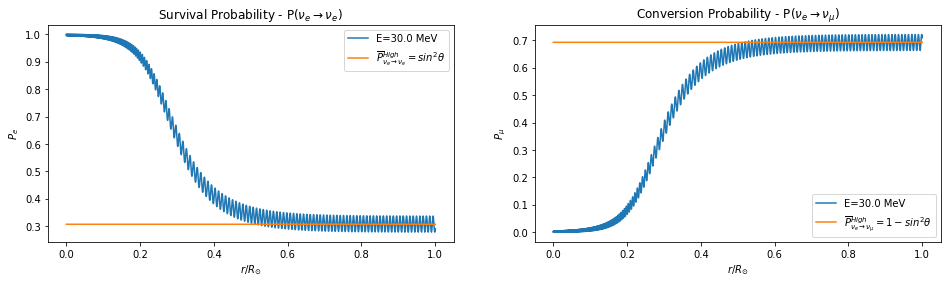

In [ ]:
fig = plt.figure(1, figsize=(16,4)) 
E_i=4
plt.subplot(121)
plt.plot((t/R_sol), 1/2*(1+psoln_curve[E_i][2]),label=r'E=%.1f MeV'%(E[E_i]*10**-6))
plt.plot((t/R_sol), Pe_high_E,label=r'$\overline{P}_{\nu_e \rightarrow \nu_e}^{High} = sin^2\theta$')
plt.xlabel(r'$r/R_{\odot}$')
plt.ylabel('$P_{e}$')
plt.title(r"Survival Probability - P($\nu_e \rightarrow \nu_e$)")
plt.legend(loc='upper right')

plt.subplot(122)
plt.plot((t/R_sol), 1/2*(1-psoln_curve[E_i][2]),label=r'E=%.1f MeV'%(E[E_i]*10**-6))
plt.plot((t/R_sol), Pmu_high_E,label=r'$\overline{P}_{\nu_e \rightarrow \nu_\mu}^{High} = 1-sin^2\theta$')
plt.xlabel(r'$r/R_{\odot}$')
plt.ylabel('$P_{\mu}$')
plt.title(r"Conversion Probability - P($\nu_e \rightarrow \nu_\mu$)")
plt.legend(loc='lower right')
plt.savefig(root_folder+"Figures/sun_high_energy_prob.png")

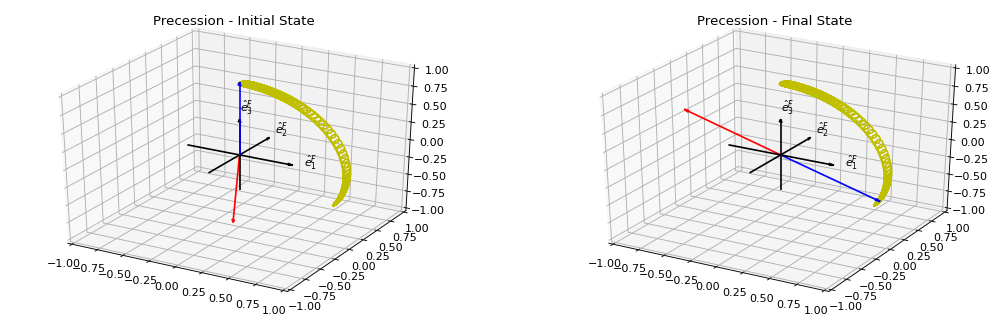

In [ ]:
E_i=4
t_i=0
t_f=len(t)-1
psoln_curve=np.transpose(psoln,(0,2,1))

fig = plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1,2,1,projection='3d')
B,B1,B2,B3 = B_matter(N_e_sol(t[t_i]),E[E_i])
ax1.quiver(0, 0, 0, B1, B2, B3, arrow_length_ratio=0.05,color='r',normalize=True)
ax1.plot(psoln_curve[E_i][0][::], psoln_curve[E_i][1][::], psoln_curve[E_i][2][::],c='y')
ax1.quiver(0, 0, 0, psoln[E_i][t_i][0], psoln[E_i][t_i][1], psoln[E_i][t_i][2], arrow_length_ratio=0.05,color='b')

ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax1.set_zlim(-1, 1)
ax1.quiver(-0.5, 0, 0, 1, 0, 0, arrow_length_ratio=0.05,color='k')
ax1.text(0.6,0,0, r"$\hat{e}^F_1$", color='k')
ax1.quiver(0, -0.5, 0, 0, 1, 0, arrow_length_ratio=0.05,color='k')
ax1.text(0,0.6,0, r"$\hat{e}^F_2$", color='k')
ax1.quiver(0, 0, -0.5, 0, 0, 1, arrow_length_ratio=0.05,color='k')
ax1.text(0,0,0.6, r"$\hat{e}^F_3$", color='k')
ax1.set_title("Precession - Initial State")

ax2 = fig.add_subplot(1,2,2,projection='3d')
B,B1,B2,B3 = B_matter(N_e_sol(t[t_f]),E[E_i])
ax2.quiver(0, 0, 0, B1, B2, B3, arrow_length_ratio=0.05,color='r',normalize=True)
ax2.plot(psoln_curve[E_i][0][::], psoln_curve[E_i][1][::], psoln_curve[E_i][2][::],c='y')
ax2.quiver(0, 0, 0, psoln[E_i][t_f][0], psoln[E_i][t_f][1], psoln[E_i][t_f][2], arrow_length_ratio=0.05,color='b')

ax2.set_xlim(-1, 1)
ax2.set_ylim(-1, 1)
ax2.set_zlim(-1, 1)
ax2.quiver(-0.5, 0, 0, 1, 0, 0, arrow_length_ratio=0.05,color='k')
ax2.text(0.6,0,0, r"$\hat{e}^F_1$", color='k')
ax2.quiver(0, -0.5, 0, 0, 1, 0, arrow_length_ratio=0.05,color='k')
ax2.text(0,0.6,0, r"$\hat{e}^F_2$", color='k')
ax2.quiver(0, 0, -0.5, 0, 0, 1, arrow_length_ratio=0.05,color='k')
ax2.text(0,0,0.6, r"$\hat{e}^F_3$", color='k')
ax2.set_title("Precession - Final State")
plt.savefig(root_folder+"Figures/sun_high_energy_precession.png")

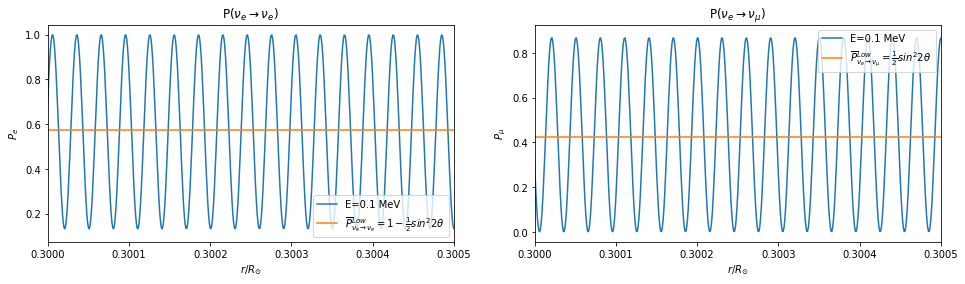

In [ ]:
fig = plt.figure(1, figsize=(16,4)) 
E_i=0
plt.subplot(121)
plt.plot((t/R_sol), 1/2*(1+psoln_curve[E_i][2]),label=r'E=%.1f MeV'%(E[E_i]*10**-6))
plt.plot((t/R_sol), Pe_low_E,label=r'$\overline{P}_{\nu_e \rightarrow \nu_e}^{Low} = 1-\frac{1}{2}sin^22\theta$')
plt.xlabel(r'$r/R_{\odot}$')
plt.ylabel('$P_{e}$')
plt.title(r"P($\nu_e \rightarrow \nu_e$)")
plt.xlim(0.3,0.3005)
plt.legend()

plt.subplot(122)
plt.plot((t/R_sol), 1/2*(1-psoln_curve[E_i][2]),label=r'E=%.1f MeV'%(E[E_i]*10**-6))
plt.plot((t/R_sol), Pmu_low_E,label=r'$\overline{P}_{\nu_e \rightarrow \nu_\mu}^{Low} = \frac{1}{2}sin^22\theta$')
plt.xlabel(r'$r/R_{\odot}$')
plt.ylabel('$P_{\mu}$')
plt.title(r"P($\nu_e \rightarrow \nu_\mu$)")
plt.xlim(0.3,0.3005)
plt.legend()
plt.savefig(root_folder+"Figures/sun_low_energy_prob.png")

In [ ]:
print(len(E))
print(len(t))
print(len(psoln_curve[1][0]))

5
1000000
1000000


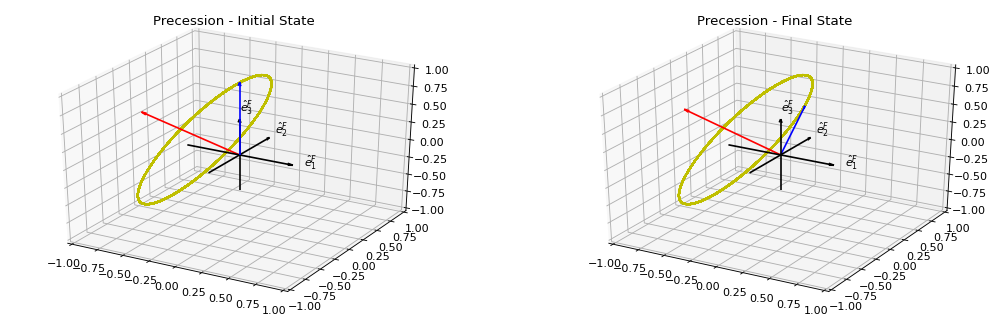

In [ ]:
E_i=0
t_i=0
t_f=len(t)-1
psoln_curve=np.transpose(psoln,(0,2,1))

fig = plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1,2,1,projection='3d')
B,B1,B2,B3 = B_matter(N_e_sol(t[t_i]),E[E_i])
ax1.quiver(0, 0, 0, B1, B2, B3, arrow_length_ratio=0.05,color='r',normalize=True)
ax1.plot(psoln_curve[E_i][0][0:10000], psoln_curve[E_i][1][0:10000], psoln_curve[E_i][2][0:10000],c='y')
ax1.quiver(0, 0, 0, psoln[E_i][t_i][0], psoln[E_i][t_i][1], psoln[E_i][t_i][2], arrow_length_ratio=0.05,color='b')

ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax1.set_zlim(-1, 1)
ax1.quiver(-0.5, 0, 0, 1, 0, 0, arrow_length_ratio=0.05,color='k')
ax1.text(0.6,0,0, r"$\hat{e}^F_1$", color='k')
ax1.quiver(0, -0.5, 0, 0, 1, 0, arrow_length_ratio=0.05,color='k')
ax1.text(0,0.6,0, r"$\hat{e}^F_2$", color='k')
ax1.quiver(0, 0, -0.5, 0, 0, 1, arrow_length_ratio=0.05,color='k')
ax1.text(0,0,0.6, r"$\hat{e}^F_3$", color='k')
ax1.set_title("Precession - Initial State")

ax2 = fig.add_subplot(1,2,2,projection='3d')
B,B1,B2,B3 = B_matter(N_e_sol(t[t_f]),E[E_i])
ax2.quiver(0, 0, 0, B1, B2, B3, arrow_length_ratio=0.05,color='r',normalize=True)
ax2.plot(psoln_curve[E_i][0][0:10000], psoln_curve[E_i][1][0:10000], psoln_curve[E_i][2][0:10000],c='y')
ax2.quiver(0, 0, 0, psoln[E_i][t_f][0], psoln[E_i][t_f][1], psoln[E_i][t_f][2], arrow_length_ratio=0.05,color='b')

ax2.set_xlim(-1, 1)
ax2.set_ylim(-1, 1)
ax2.set_zlim(-1, 1)
ax2.quiver(-0.5, 0, 0, 1, 0, 0, arrow_length_ratio=0.05,color='k')
ax2.text(0.6,0,0, r"$\hat{e}^F_1$", color='k')
ax2.quiver(0, -0.5, 0, 0, 1, 0, arrow_length_ratio=0.05,color='k')
ax2.text(0,0.6,0, r"$\hat{e}^F_2$", color='k')
ax2.quiver(0, 0, -0.5, 0, 0, 1, arrow_length_ratio=0.05,color='k')
ax2.text(0,0,0.6, r"$\hat{e}^F_3$", color='k')
ax2.set_title("Precession - Final State")
plt.savefig(root_folder+"Figures/sun_low_energy_precession.png")

## Animations

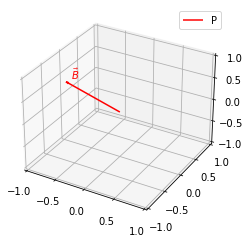

In [9]:
E_i=0
t_i=0

fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.set_zlim3d(-1,1)
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
  
B,B1,B2,B3 = B_matter(N_e_sol(t[t_i]),E[E_i])
#ax.quiver(0, 0, 0, psoln[E_i][t_i][0], psoln[E_i][t_i][1], psoln[E_i][t_i][2], arrow_length_ratio=0.05,color='b')
#ax.quiver(0, 0, 0, B1, B2, B3,arrow_length_ratio=0.05,color='r',normalize=True)
q = ax.quiver(0, 0, 0, B1, B2, B3, arrow_length_ratio=0.05,color='r',normalize=True, label='P')
tex=ax.text(B1/B+0.05, B2/B+0.05, B3/B+0.05, r"$\vec{B}$", color='red')
#plt.quiverkey(line, 1.2, 0.515, 2, 'P', coordinates='data')

#line.set_data(0, 0, 0, B1, B2, B3)
#ax.quiver(-0.5, 0, 0, 1, 0, 0, arrow_length_ratio=0.05,color='k')
#ax.quiver(0, -0.5, 0, 0, 1, 0, arrow_length_ratio=0.05,color='k')
#ax.quiver(0, 0, -0.5, 0, 0, 1, arrow_length_ratio=0.05,color='k')
plt.legend()
plt.show()

In [80]:
B,B1,B2,B3 = B_matter(N_e_sol(t[0]),E[E_i])
x1, y1, z1  = proj3d.proj_transform(B1/B+0.05, B2/B+0.05, B3/B+0.05, ax1.get_proj())
print(x1,y1)

-0.04192994573238082 0.028072665188133446


-0.6093090401650658 0.42878551508592516


/home/pedro/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


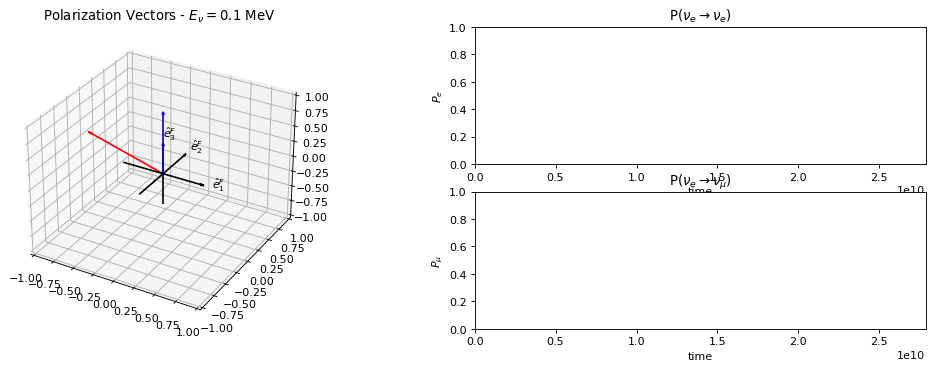

In [78]:
E_i=0

fig = plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1,2,1,projection='3d')

B,B1,B2,B3 = B_matter(N_e_sol(t[0]),E[E_i])
#print(B1/B,B2/B,B3/B)
quiver_B = ax1.quiver(0, 0, 0, B1, B2, B3, arrow_length_ratio=0.05,color='r',normalize=True)
#print(B1/B,B2/B,B3/B)
#text
x1, y1, z1  = proj3d.proj_transform(B1/B+0.05, B2/B+0.05, B3/B+0.05, ax1.get_proj())
print(x1,y1)
#text_B=ax1.text2D(-0.048, 0.028, r"$\vec{B}$", color='red')
#text_B=ax1.text(B1/B+0.05, B2/B+0.05, B3/B+0.05, r"$\vec{B}$", color='red')

P1,P2,P3= psoln[E_i][0][0], psoln[E_i][0][1], psoln[E_i][0][2],
quiver = ax1.quiver(0, 0, 0,P1,P2,P3, arrow_length_ratio=0.05,color='b')
#text
#x2, y2, z2 = proj3d.proj_transform(P1+0.05,P2+0.05,P3+0.05, ax1.get_proj())
#text_P=ax1.text2D(x2, y2, r"$\vec{P}$", color='blue')
#text_P=ax1.text(P1+0.05,P2+0.05,P3+0.05, r"$\vec{P}$", color='blue')

ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax1.set_zlim(-1, 1)
ax1.quiver(-0.5, 0, 0, 1, 0, 0, arrow_length_ratio=0.05,color='k')
ax1.text(0.6,0,0, r"$\hat{e}^F_1$", color='k')
ax1.quiver(0, -0.5, 0, 0, 1, 0, arrow_length_ratio=0.05,color='k')
ax1.text(0,0.6,0, r"$\hat{e}^F_2$", color='k')
ax1.quiver(0, 0, -0.5, 0, 0, 1, arrow_length_ratio=0.05,color='k')
ax1.text(0,0,0.6, r"$\hat{e}^F_3$", color='k')
ax1.set_title(r'Polarization Vectors - $E_\nu=%.1f$ MeV'%(E[E_i]/(10**6)))

ax2 = fig.add_subplot(2, 2, 2)
ax2.set_ylim(0, 1)
ax2.set_xlim(0, t[50])
ax2.set_xlabel('time')
ax2.set_ylabel("$P_{e}$")
ax2.set_title(r"P($\nu_e \rightarrow \nu_e$)")
Pe, = ax2.plot([], [])

ax3 = fig.add_subplot(2, 2, 4)
ax3.set_ylim(0, 1)
ax3.set_xlim(0, t[50])
ax3.set_xlabel('time')
ax3.set_ylabel('$P_{\mu}$')
ax3.set_title(r"P($\nu_e \rightarrow \nu_\mu$)")
Pmu, = ax3.plot([], [])



def update(t_i):
    #3D plot
    #Bvector
    global quiver_B
    quiver_B.remove()
    B,B1,B2,B3 = B_matter(N_e_sol(t[t_i]),E[E_i])
    quiver_B = ax1.quiver(0, 0, 0, B1, B2, B3, arrow_length_ratio=0.05,color='r',normalize=True)
    #Text
    #x2, y2, z2 = proj3d.proj_transform(B1/B+0.05, B2/B+0.05, B3/B+0.05, ax1.get_proj())
    #text_B.set_position((x2,y2))
    #P vector
    global quiver
    quiver.remove()
    P1,P2,P3= psoln[E_i][t_i][0], psoln[E_i][t_i][1], psoln[E_i][t_i][2]
    quiver = ax1.quiver(0, 0, 0,P1,P2,P3, arrow_length_ratio=0.05,color='b')
    #Text
    #x2, y2, z2 = proj3d.proj_transform(P1+0.05,P2+0.05,P3+0.05, ax1.get_proj())
    #text_P.set_position((x2,y2))
    #text_P.set_position((P1+0.05,P2+0.05,P3+0.05))

    
    #Probability plots
    #ax2.plot(t[0:t_i], 1/2*(1+psoln_curve[E_i][2][0:t_i]))
    Pe.set_data(t[0:t_i], 1/2*(1+psoln_curve[E_i][2][0:t_i]))
    #ax3.plot(t[0:t_i], 1/2*(1-psoln_curve[E_i][2][0:t_i]))
    Pmu.set_data(t[0:t_i], 1/2*(1-psoln_curve[E_i][2][0:t_i]))

ani = FuncAnimation(fig, update, frames=np.arange(0,50,1), interval=100)

In [76]:
HTML(ani.to_html5_video())

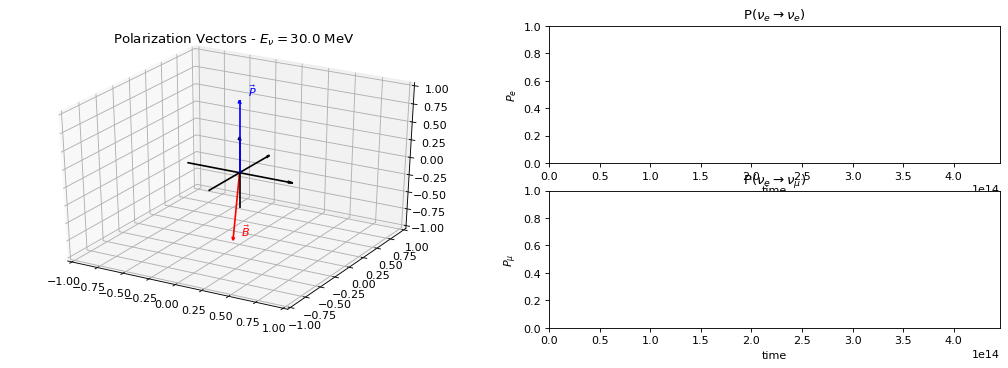

In [ ]:
E_i=4
t_step=1000
t_f=800000

fig = plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1,2,1,projection='3d')

B,B1,B2,B3 = B_matter(N_e_sol(t[0]),E[E_i])
quiver_B = ax1.quiver(0, 0, 0, B1, B2, B3, arrow_length_ratio=0.05,color='r',normalize=True)
#text
x2, y2, z2 = proj3d.proj_transform(B1/B+0.05, B2/B+0.05, B3/B+0.05, ax1.get_proj())
text_B=ax1.text2D(x2, y2, r"$\vec{B}$", color='red')

P1,P2,P3= psoln[E_i][0][0], psoln[E_i][0][1], psoln[E_i][0][2],
quiver = ax1.quiver(0, 0, 0,P1,P2,P3, arrow_length_ratio=0.05,color='b')
#text
x2, y2, z2 = proj3d.proj_transform(P1+0.05,P2+0.05,P3+0.05, ax1.get_proj())
text_P=ax1.text2D(x2, y2, r"$\vec{P}$", color='blue')

ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax1.set_zlim(-1, 1)
ax1.quiver(-0.5, 0, 0, 1, 0, 0, arrow_length_ratio=0.05,color='k')
ax1.quiver(0, -0.5, 0, 0, 1, 0, arrow_length_ratio=0.05,color='k')
ax1.quiver(0, 0, -0.5, 0, 0, 1, arrow_length_ratio=0.05,color='k')
ax1.set_title(r'Polarization Vectors - $E_\nu=%.1f$ MeV'%(E[E_i]/(10**6)))

ax2 = fig.add_subplot(2, 2, 2)
ax2.set_ylim(0, 1)
ax2.set_xlim(0, t[t_f-1])
ax2.set_xlabel('time')
ax2.set_ylabel("$P_{e}$")
ax2.set_title(r"P($\nu_e \rightarrow \nu_e$)")
Pe, = ax2.plot([], [])

ax3 = fig.add_subplot(2, 2, 4)
ax3.set_ylim(0, 1)
ax3.set_xlim(0, t[t_f-1])
ax3.set_xlabel('time')
ax3.set_ylabel('$P_{\mu}$')
ax3.set_title(r"P($\nu_e \rightarrow \nu_\mu$)")
Pmu, = ax3.plot([], [])



def update(t_i):
    #3D plot
    #Bvector
    global quiver_B
    quiver_B.remove()
    B,B1,B2,B3 = B_matter(N_e_sol(t[t_i]),E[E_i])
    quiver_B = ax1.quiver(0, 0, 0, B1, B2, B3, arrow_length_ratio=0.05,color='r',normalize=True)
    #Text
    x2, y2, z2 = proj3d.proj_transform(B1/B+0.05, B2/B+0.05, B3/B+0.05, ax1.get_proj())
    text_B.set_position((x2,y2))
    #P vector
    global quiver
    quiver.remove()
    P1,P2,P3= psoln[E_i][t_i][0], psoln[E_i][t_i][1], psoln[E_i][t_i][2]
    quiver = ax1.quiver(0, 0, 0,P1,P2,P3, arrow_length_ratio=0.05,color='b')
    #Text
    x2, y2, z2 = proj3d.proj_transform(P1+0.05,P2+0.05,P3+0.05, ax1.get_proj())
    text_P.set_position((x2,y2))
    
    #Probability plots
    #ax2.plot(t[0:t_i], 1/2*(1+psoln_curve[E_i][2][0:t_i]))
    Pe.set_data(t[0:t_i], 1/2*(1+psoln_curve[E_i][2][0:t_i]))
    #ax3.plot(t[0:t_i], 1/2*(1-psoln_curve[E_i][2][0:t_i]))
    Pmu.set_data(t[0:t_i], 1/2*(1-psoln_curve[E_i][2][0:t_i]))

ani = FuncAnimation(fig, update, frames=np.arange(0,t_f,t_step), interval=100)

In [ ]:
HTML(ani.to_html5_video())

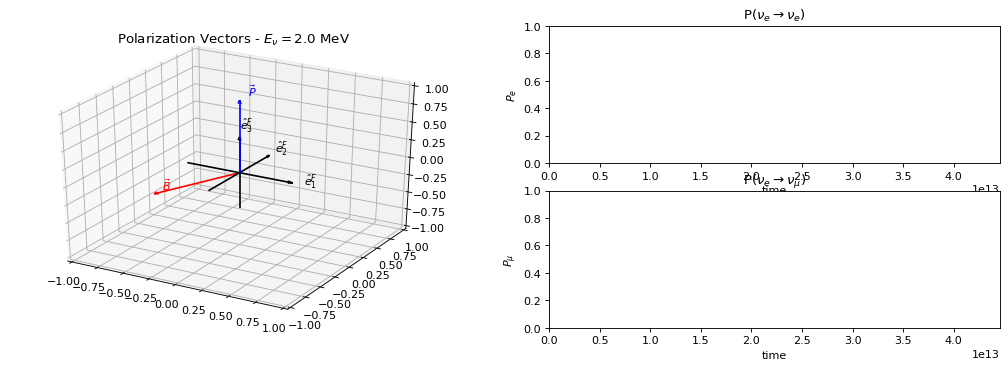

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.animation import FuncAnimation

E_i=2
t_step=100
t_f=80000

fig = plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1,2,1,projection='3d')

B,B1,B2,B3 = B_matter(N_e_sol(t[0]),E[E_i])
quiver_B = ax1.quiver(0, 0, 0, B1, B2, B3, arrow_length_ratio=0.05,color='r',normalize=True)
#text
x2, y2, z2 = proj3d.proj_transform(B1/B+0.05, B2/B+0.05, B3/B+0.05, ax1.get_proj())
text_B=ax1.text2D(x2, y2, r"$\vec{B}$", color='red')

P1,P2,P3= psoln[E_i][0][0], psoln[E_i][0][1], psoln[E_i][0][2],
quiver = ax1.quiver(0, 0, 0,P1,P2,P3, arrow_length_ratio=0.05,color='b')
#text
x2, y2, z2 = proj3d.proj_transform(P1+0.05,P2+0.05,P3+0.05, ax1.get_proj())
text_P=ax1.text2D(x2, y2, r"$\vec{P}$", color='blue')

ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax1.set_zlim(-1, 1)
ax1.quiver(-0.5, 0, 0, 1, 0, 0, arrow_length_ratio=0.05,color='k')
ax1.text(0.6,0,0, r"$\hat{e}^F_1$", color='k')
ax1.quiver(0, -0.5, 0, 0, 1, 0, arrow_length_ratio=0.05,color='k')
ax1.text(0,0.6,0, r"$\hat{e}^F_2$", color='k')
ax1.quiver(0, 0, -0.5, 0, 0, 1, arrow_length_ratio=0.05,color='k')
ax1.text(0,0,0.6, r"$\hat{e}^F_3$", color='k')
ax1.set_title(r'Polarization Vectors - $E_\nu=%.1f$ MeV'%(E[E_i]/(10**6)))

ax2 = fig.add_subplot(2, 2, 2)
ax2.set_ylim(0, 1)
ax2.set_xlim(0, t[t_f-1])
ax2.set_xlabel('time')
ax2.set_ylabel("$P_{e}$")
ax2.set_title(r"P($\nu_e \rightarrow \nu_e$)")
Pe, = ax2.plot([], [])

ax3 = fig.add_subplot(2, 2, 4)
ax3.set_ylim(0, 1)
ax3.set_xlim(0, t[t_f-1])
ax3.set_xlabel('time')
ax3.set_ylabel('$P_{\mu}$')
ax3.set_title(r"P($\nu_e \rightarrow \nu_\mu$)")
Pmu, = ax3.plot([], [])



def update(t_i):
    #3D plot
    #Bvector
    global quiver_B
    quiver_B.remove()
    B,B1,B2,B3 = B_matter(N_e_sol(t[t_i]),E[E_i])
    quiver_B = ax1.quiver(0, 0, 0, B1, B2, B3, arrow_length_ratio=0.05,color='r',normalize=True)
    #Text
    x2, y2, z2 = proj3d.proj_transform(B1/B+0.05, B2/B+0.05, B3/B+0.05, ax1.get_proj())
    text_B.set_position((x2,y2))
    #P vector
    global quiver
    quiver.remove()
    P1,P2,P3= psoln[E_i][t_i][0], psoln[E_i][t_i][1], psoln[E_i][t_i][2]
    quiver = ax1.quiver(0, 0, 0,P1,P2,P3, arrow_length_ratio=0.05,color='b')
    #Text
    x2, y2, z2 = proj3d.proj_transform(P1+0.05,P2+0.05,P3+0.05, ax1.get_proj())
    text_P.set_position((x2,y2))
    
    #Probability plots
    #ax2.plot(t[0:t_i], 1/2*(1+psoln_curve[E_i][2][0:t_i]))
    Pe.set_data(t[0:t_i], 1/2*(1+psoln_curve[E_i][2][0:t_i]))
    #ax3.plot(t[0:t_i], 1/2*(1-psoln_curve[E_i][2][0:t_i]))
    Pmu.set_data(t[0:t_i], 1/2*(1-psoln_curve[E_i][2][0:t_i]))

ani = FuncAnimation(fig, update, frames=np.arange(0,t_f,t_step), interval=100)

In [ ]:
HTML(ani.to_html5_video())